In [77]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import random

In [78]:
X, y = make_blobs(n_samples=50, centers=3, n_features=2)

In [79]:
"""
X = np.array([[1, 2], 
              [1.5, 1.8], 
              [5, 8], 
              [8, 8],
              [1, 0.6],
              [9, 11],
              [8, 2],
              [10, 2],
              [9, 3],])
"""

'\nX = np.array([[1, 2], \n              [1.5, 1.8], \n              [5, 8], \n              [8, 8],\n              [1, 0.6],\n              [9, 11],\n              [8, 2],\n              [10, 2],\n              [9, 3],])\n'

In [80]:
colors = 10*['g', 'r', 'c', 'b', 'k']

In [81]:
class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
        
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        weights = [i for i in range(self.radius_norm_step)][::-1]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add
                        
                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                    
            if optimized:
                break
                
        self.centroids = centroids
        
        self.classifications = {}
        
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
        
    def predict(self, data):
        distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

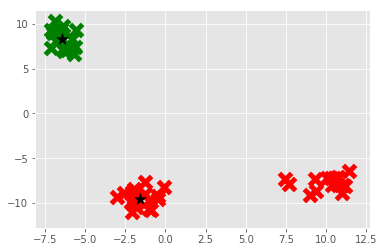

In [82]:
clf = Mean_Shift()
clf.fit(X)
centroids = clf.centroids

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150, linewidth=5)
        
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

In [83]:
centers

6